# README.md
Build some initial statistics

1) What are the enrichments from the notes? 
2) How many pts don’t have a start date? End date? How many are overlapped? And for each drug?
3) Run through the inital ADT use pipeline to get the start and end date distribution, and duration
4) Validate by manual chart reviews for 15 random pts (computational vs manual)

# Step1, read from spreadsheet, clean up, and get statistics

In [1]:
import numpy as np
import pandas as pd
import sys, getopt
import csv
from datetime import datetime
import itertools

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt

%matplotlib inline  
import seaborn as sns

In [46]:
df1=pd.read_excel("large_tableA.xls", header=0)
df1.fillna('', inplace=True)

In [47]:
index_list=df1.columns
index_list

Index(['person_id', 'cancer_drug', 'category', 'start_date_source',
       'start_date_note_id', 'start_date_note_date', 'start_date_sent_id',
       'start_date_evidence', 'start_date_matched_text', 'start_date_year',
       'start_date_month', 'start_date_day', 'end_date_source',
       'end_date_note_id', 'end_date_note_date', 'end_date_sent_id',
       'end_date_evidence', 'end_date_matched_text', 'end_date_year',
       'end_date_month', 'end_date_day', 'first_mentioned_note_id',
       'first_mentioned_note_date', 'first_mentioned_evidence',
       'first_mentioned_matched_text', 'last_mentioned_note_id',
       'last_mentioned_note_date', 'last_mentioned_evidence',
       'last_mentioned_text'],
      dtype='object')

In [48]:
#delete empty columns

print(df1.shape)
del_col=['category',
       'start_date_note_id', 'start_date_note_date', 'start_date_sent_id',
       'start_date_evidence', 'start_date_matched_text', 
       'end_date_note_id', 'end_date_note_date', 'end_date_sent_id',
       'end_date_evidence', 'end_date_matched_text', 'first_mentioned_note_id',
       'first_mentioned_note_date', 'first_mentioned_evidence',
       'first_mentioned_matched_text', 'last_mentioned_note_id',
       'last_mentioned_note_date', 'last_mentioned_evidence',
       'last_mentioned_text']

for col in del_col:
    del df1[col]
print(df1.shape)

(2015, 29)
(2015, 10)


In [49]:
df1[:15]

,person_id,cancer_drug,start_date_source,start_date_year,start_date_month,start_date_day,end_date_source,end_date_year,end_date_month,end_date_day
0,2,Leuprolide,Notes,2009,2,26,MedTable,2017,2,1
1,12,Leuprolide,MedTable,2013,5,6,,,,
2,13,Leuprolide,MedTable,2010,9,9,MedTable,2018,5,17
3,13,Degarelix,,,,,,,,
4,13,Goserelin,MedTable,2010,6,17,MedTable,2012,8,30
5,18,Goserelin,MedTable,2013,12,9,MedTable,2014,3,13
6,18,Degarelix,MedTable,2013,11,12,,,,
7,22,Leuprolide,Notes,2010,9,27,MedTable,2017,4,24
8,25,Leuprolide,MedTable,2013,11,12,MedTable,2014,2,18
9,26,Leuprolide,Notes,2014,11,26,Notes,2016,6,


In [6]:
df2=df1

# Research question: What's the enrichment to MedTable from the Notes for each drug? 
For the start and end date? How many have missing values?     

In [7]:
start_note_list=[]
start_med_list=[]

end_note_list=[]
end_med_list=[]

for ind in df1.index:
 
    if (df1['start_date_source'][ind]=='Notes'): 
        start_note_list.append(ind)  
    if (df1['start_date_source'][ind]=='MedTable'): 
        start_med_list.append(ind)     
        
    if (df1['end_date_source'][ind]=='Notes'): 
        end_note_list.append(ind)  
    if (df1['end_date_source'][ind]=='MedTable'): 
        end_med_list.append(ind)     

print("start_note ", len(start_note_list))
print("start_med ", len(start_med_list))
print("start_nan ", df1['start_date_source'].isnull().sum())
print("total_start", len(start_note_list)+len(start_med_list)+df1['start_date_source'].isnull().sum())
print(" ")
print("end_note ", len(end_note_list))
print("end_med ", len(end_med_list))
print("end_nan ", df1['end_date_source'].isnull().sum())
print("total_end", len(end_note_list)+len(end_med_list)+df1['end_date_source'].isnull().sum())

start_note  877
start_med  681
start_nan  0
total_start 1558
 
end_note  307
end_med  879
end_nan  0
total_end 1186


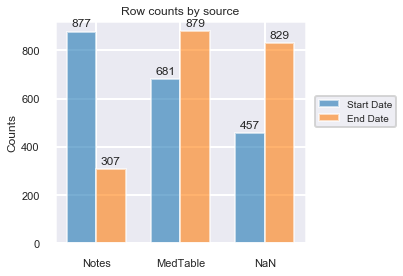

In [8]:
labels = ['Notes', 'MedTable', 'NaN']
start_counts = [877, 681, 457]
end_counts = [307, 879, 829]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 2})
sns.set_style("darkgrid")
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, start_counts, width, label='Start Date', alpha=0.6)
rects2 = ax.bar(x + width/2, end_counts, width, label='End Date', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Row counts by source')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1, bbox_to_anchor=(1.2, 0.5),loc='lower center', fontsize='small')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

In [9]:
#how many lines that have both start and end date as nan?
#these correspond to how many patients?

df1_start_null=df1[df1['start_date_year'].isnull()]
df1_end_null=df1[df1['end_date_source'].isnull()]

In [10]:
start_empty_list=df1[df1['start_date_year'] == ''].index.to_list()
end_empty_list=df1[df1['end_date_year'] == ''].index.to_list()

In [11]:
test1=[x for x in start_empty_list if x in end_empty_list]
print("# of pts that have no start nor end :",len(test1))
test2=[x for x in start_empty_list  if x not in end_empty_list]
print("# of pts that no start but with an end date:",len(test2))
test3=[x for x in end_empty_list if x not in start_empty_list ]
print("# of pts that have a start but no end date:",len(test3))

#list_pts_bothdates_empty=set(list_pts_start_empty).intersection(list_pts_end_empty)
#print("number of pts with both start and end empty: ", len(list_pts_bothdates_empty))

# of pts that have no start nor end : 457
# of pts that no start but with an end date: 0
# of pts that have a start but no end date: 372


In [12]:
len(df1_start_null)

0

In [13]:
#group to pt level
df2_start=df1_start_null.groupby(["person_id"]).size().reset_index(name='counts')
df2_end=df1_end_null.groupby(["person_id"]).size().reset_index(name='counts')

In [14]:
list_pts_start_empty=df2_start["person_id"].to_list()
print(len(list_pts_start_empty))

list_pts_end_empty=df2_end["person_id"].to_list()
print(len(list_pts_end_empty))

0
0


In [15]:
test1=[x for x in list_pts_start_empty if x in list_pts_end_empty]
print("# of pts that have no start nor end :",len(test1))
test2=[x for x in list_pts_start_empty if x not in list_pts_end_empty]
print("# of pts that no start but with an end date:",len(test2))
test3=[x for x in list_pts_end_empty if x not in list_pts_start_empty]
print("# of pts that have a start but no end date:",len(test3))

#list_pts_bothdates_empty=set(list_pts_start_empty).intersection(list_pts_end_empty)
#print("number of pts with both start and end empty: ", len(list_pts_bothdates_empty))

# of pts that have no start nor end : 0
# of pts that no start but with an end date: 0
# of pts that have a start but no end date: 0


In [16]:
Notes_start_row_list=df1[df1['start_date_source'] == 'Notes']

In [17]:
#pt id list in only in Notes, only in Medtable and in both for start date, and end date (6 lists)
#group by drug names 

Notes_start_byrow=df1[df1['start_date_source'] == 'Notes']

In [18]:
df1[df1['start_date_source'] == 'Notes'].groupby(["person_id"])

In [19]:
ADT_lib=["Leuprolide","Degarelix","Goserelin","Triptorelin","Histrelin"]

In [20]:
df_start_group=df1.groupby(["cancer_drug","start_date_source"]).size() 
df_start_group

cancer_drug  start_date_source
Degarelix                         100
             MedTable              97
             Notes                245
Goserelin                          41
             MedTable              87
             Notes                 41
Histrelin                           6
             MedTable               1
             Notes                  1
Leuprolide                        289
             MedTable             486
             Notes                576
Triptorelin                        21
             MedTable              10
             Notes                 14
dtype: int64

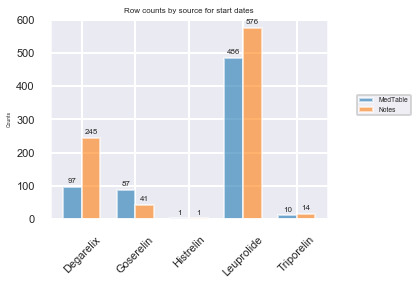

In [21]:
labels =["Degarelix","Goserelin","Histrelin","Leuprolide","Triptorelin"]
start_med = [97,87,1,486,10]
start_note = [245,41,1,576,14]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
sns.set_context("poster", font_scale=0.5, rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5,"lines.linewidth": 2})
sns.set_style("darkgrid")
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, start_med, width, label='MedTable', alpha=0.6)
rects2 = ax.bar(x + width/2, start_note, width, label='Notes', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Row counts by source for start dates')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=45)
ax.legend(ncol=1, bbox_to_anchor=(1.2, 0.5),loc='lower center', fontsize='small')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

(<Figure size 1080x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff4d0fa1310>)

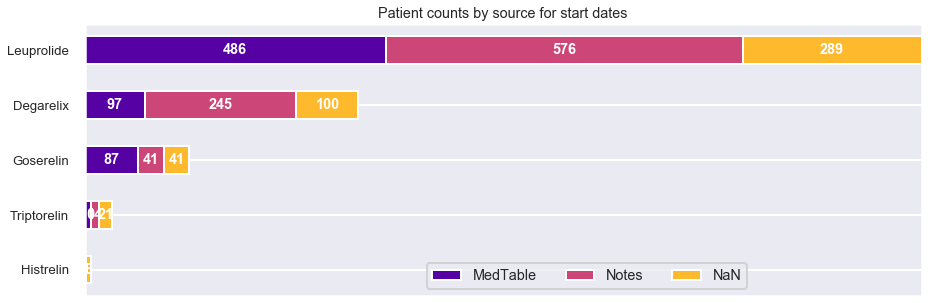

In [69]:
category_names = ['MedTable', 'Notes', 'NaN']
results = {
    "Leuprolide": [486,576,289],
    "Degarelix": [97, 245,100],
    "Goserelin": [87,41,41],
    "Triptorelin": [10,14,21],
    "Histrelin": [1,1,8]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('plasma')(
        np.linspace(0.15, 0.85, data.shape[1]))

    sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title('Patient counts by source for start dates')
    
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color,fontweight='bold')
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.4, 0),
              loc='lower left', fontsize='medium')

    return fig, ax


survey(results, category_names)

(<Figure size 1080x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff4f06946d0>)

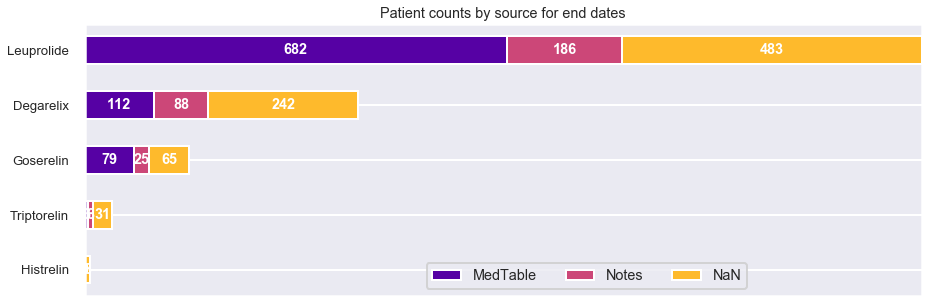

In [68]:
category_names = ['MedTable', 'Notes', 'NaN']
results = {
    "Leuprolide": [682,186,483],
    "Degarelix": [112,88,242],
    "Goserelin": [79,25,65],
    "Triptorelin": [6,8,31],
    "Histrelin": [0,0,8]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('plasma')(
        np.linspace(0.15, 0.85, data.shape[1]))

    sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title('Patient counts by source for end dates')
    
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color, fontweight='bold')
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.4, 0),
              loc='lower left', fontsize='medium')

    return fig, ax


survey(results, category_names)

In [23]:
df_endmed_group=df1.groupby(["cancer_drug","end_date_source"]).size() 
#.reset_index(name='counts')
df_endmed_group

cancer_drug  end_date_source
Degarelix                       242
             MedTable           112
             Notes               88
Goserelin                        65
             MedTable            79
             Notes               25
Histrelin                         8
Leuprolide                      483
             MedTable           682
             Notes              186
Triptorelin                      31
             MedTable             6
             Notes                8
dtype: int64

In [24]:
df_endmed_group=df1.groupby(["end_date_source"]).size() 
#.reset_index(name='counts')
df_endmed_group

end_date_source
            829
MedTable    879
Notes       307
dtype: int64

In [25]:
#subgroup by row
#further grouped by pt
#get stat
#get the list of pt ids

dfstart_med=df1[(df1["start_date_source"] == "MedTable")]
A=dfstart_med
dfstart_pt_med=A.groupby(["person_id"]).size().reset_index(name='counts')
print("start med row #: " +str(len(A)))
list_start_pt_med=A.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()

start med row #: 681


In [45]:
df1

,person_id,cancer_drug,start_date_source,start_date_year,start_date_month,start_date_day,end_date_source,end_date_year,end_date_month,end_date_day
0,2,Leuprolide,Notes,2009,2,26,MedTable,2017,2,1
1,12,Leuprolide,MedTable,2013,5,6,,,,
2,13,Leuprolide,MedTable,2010,9,9,MedTable,2018,5,17
3,13,Degarelix,,,,,,,,
4,13,Goserelin,MedTable,2010,6,17,MedTable,2012,8,30
...,...,...,...,...,...,...,...,...,...,...
2010,203736,Leuprolide,Notes,2020,7,7,MedTable,2020,10,14
2011,203796,Leuprolide,MedTable,2020,10,6,,,,
2012,204648,Leuprolide,MedTable,2020,11,3,,,,
2013,205144,Leuprolide,Notes,2020,7,13,MedTable,2020,10,12


In [58]:
#Leuprolide
df_start_leu=df1[(df1["cancer_drug"] == "Leuprolide")][(df1["start_date_source"] == "MedTable")]
dfstart_leu_pt=df_start_leu.groupby(["person_id"]).size().reset_index(name='counts')
list_start_leu_pt=dfstart_leu_pt["person_id"].to_list()
print("start_leu pt #: " +str(len(list_start_leu_pt)))

start_leu pt #: 486


/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [57]:
df_start_leu

,person_id,cancer_drug,start_date_source,start_date_year,start_date_month,start_date_day,end_date_source,end_date_year,end_date_month,end_date_day
1,12,Leuprolide,MedTable,2013,5,6,,,,
2,13,Leuprolide,MedTable,2010,9,9,MedTable,2018,5,17
8,25,Leuprolide,MedTable,2013,11,12,MedTable,2014,2,18
10,37,Leuprolide,MedTable,2010,9,29,Notes,2016,9,2
12,53,Leuprolide,MedTable,2013,2,25,Notes,2016,,
...,...,...,...,...,...,...,...,...,...,...
2004,201343,Leuprolide,MedTable,2020,9,1,,,,
2006,203582,Leuprolide,MedTable,2020,8,24,,,,
2007,203609,Leuprolide,MedTable,2020,9,10,,,,
2011,203796,Leuprolide,MedTable,2020,10,6,,,,


In [53]:
#Leuprolide
df_start_leu=df1[(df1["cancer_drug"] == "Leuprolide")]
dfstart_leu_pt=dfstart_leu.groupby(["person_id"]).size().reset_index(name='counts')
list_start_leu_pt=dfstart_leu_pt["person_id"].to_list()
print("start_leu pt #: " +str(len(list_start_leu_pt)))

#start medtable
dfstart_med=df1[(df1["start_date_source"] == "MedTable")]
A=dfstart_med
dfstart_med_leu=A[(A.cancer_drug =="Leuprolide")]
dfstart_med_leu_pt=dfstart_med_leu.groupby(["person_id"]).size().reset_index(name='counts')
list_start_med_leu_pt=dfstart_med_leu_pt["person_id"].to_list()
print("start_med_leu pt #: " +str(len(list_start_med_leu_pt)))

#start notes
dfstart_notes=df1[(df1["start_date_source"] == "Notes")]
B=dfstart_notes
#Leuprolide
dfstart_notes_leu=B[(B.cancer_drug =="Leuprolide")]
dfstart_notes_leu_pt=dfstart_notes_leu.groupby(["person_id"]).size().reset_index(name='counts')
list_start_notes_leu_pt=dfstart_notes_leu_pt["person_id"].to_list()
print("start_notes_leu pt #: " +str(len(list_start_notes_leu_pt)))

#overlaps
start_leu_just_med=[x for x in list_start_med_leu_pt if x not in list_start_notes_leu_pt]
start_leu_just_notes=[x for x in list_start_notes_leu_pt if x not in list_start_med_leu_pt]
overlap_start_med_notes_leu=[x for x in list_start_med_leu_pt if x in list_start_notes_leu_pt]

print("start leu just med pt #: " +str(len(start_leu_just_med)))
print("start leu just notes pt #: " +str(len(start_leu_just_notes)))
print("start leu overlap pt #: " +str(len(overlap_start_med_notes_leu)))

start_leu pt #: 1351
start_med_leu pt #: 486
start_notes_leu pt #: 576
start leu just med pt #: 486
start leu just notes pt #: 576
start leu overlap pt #: 0


In [ ]:
#Leuprolide
df_start_leu=df1[(df1["cancer_drug"] == "Leuprolide")]
dfstart_leu_pt=dfstart_leu.groupby(["person_id"]).size().reset_index(name='counts')
list_start_leu_pt=dfstart_leu_pt["person_id"].to_list()
print("start_leu pt #: " +str(len(list_start_leu_pt)))

#start medtable
df_all_notes=df1[(df1["start_date_source"] == "Notes")][(df1["end_date_source"] == "Notes")]
A=dfstart_med
dfstart_med_leu=A[(A.cancer_drug =="Leuprolide")]
dfstart_med_leu_pt=dfstart_med_leu.groupby(["person_id"]).size().reset_index(name='counts')
list_start_med_leu_pt=dfstart_med_leu_pt["person_id"].to_list()
print("start_med_leu pt #: " +str(len(list_start_med_leu_pt)))

#start notes
dfstart_notes=df1[(df1["start_date_source"] == "Notes")]
B=dfstart_notes
#Leuprolide
dfstart_notes_leu=B[(B.cancer_drug =="Leuprolide")]
dfstart_notes_leu_pt=dfstart_notes_leu.groupby(["person_id"]).size().reset_index(name='counts')
list_start_notes_leu_pt=dfstart_notes_leu_pt["person_id"].to_list()
print("start_notes_leu pt #: " +str(len(list_start_notes_leu_pt)))

#overlaps
start_leu_just_med=[x for x in list_start_med_leu_pt if x not in list_start_notes_leu_pt]
start_leu_just_notes=[x for x in list_start_notes_leu_pt if x not in list_start_med_leu_pt]
overlap_start_med_notes_leu=[x for x in list_start_med_leu_pt if x in list_start_notes_leu_pt]

print("start leu just med pt #: " +str(len(start_leu_just_med)))
print("start leu just notes pt #: " +str(len(start_leu_just_notes)))
print("start leu overlap pt #: " +str(len(overlap_start_med_notes_leu)))

In [72]:
df_all_notes=df1[(df1["start_date_source"] == "Notes")][(df1["end_date_source"] == "Notes")]
df_all_notes_pt=df_all_notes.groupby(["person_id"]).size().reset_index(name='counts')
list_df_all_notes_pt=df_all_notes_pt["person_id"].to_list()
print("all notes pt #: " +str(len(list_df_all_notes_pt)))

all notes pt #: 213


/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df_all_notes=df1[(df1["start_date_source"] == "Notes")][(df1["end_date_source"] == "Notes")]
df_all_notes_pt=df_all_notes.groupby(["person_id"]).size().reset_index(name='counts')
list_df_all_notes_pt=df_all_notes_pt["person_id"].to_list()
print("all notes pt #: " +str(len(list_df_all_notes_pt)))

In [77]:
df_leu=df1[(df1["cancer_drug"] == "Histrelin")]
df_leu_all_notes=df_leu[(df_leu["start_date_source"] == "Notes")][(df_leu["end_date_source"] == "Notes")]
df_leu_all_notes_pt=df_leu_all_notes.groupby(["person_id"]).size().reset_index(name='counts')
list_df_leu_all_notes_pt=df_leu_all_notes_pt["person_id"].to_list()
print("leu exclusively notes pt #: " +str(len(list_df_leu_all_notes_pt)))

leu exclusively notes pt #: 0


/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
ADT_lib=["Leuprolide","Degarelix","Goserelin","Triptorelin","Histrelin"]

In [ ]:
df_leu=df1[(df1["cancer_drug"] == "Leuprolide")]
df_leu_all_notes=df_leu[(df_leu["start_date_source"] == "Notes")][(df_leu["end_date_source"] == "Notes")]
df_leu_all_notes_pt=df_leu_all_notes.groupby(["person_id"]).size().reset_index(name='counts')
list_df_leu_all_notes_pt=df_leu_all_notes_pt["person_id"].to_list()
print("leu exclusively notes pt #: " +str(len(list_df_leu_all_notes_pt)))

In [71]:
shape(df_all_notes)

(222, 10)

In [64]:
#Leuprolide
ADT_lib=["Leuprolide","Degarelix","Goserelin","Triptorelin","Histrelin"]

#Leuprolide

df_start_leu=df1[(df1["cancer_drug"] == "Leuprolide")]
dfstart_leu_pt=dfstart_leu.groupby(["person_id"]).size().reset_index(name='counts')
list_start_leu_pt=dfstart_leu_pt["person_id"].to_list()
print("start_leu pt #: " +str(len(list_start_leu_pt)))

df_start_deg=df1[(df1["cancer_drug"] == "Degarelix")]
dfstart_deg_pt=df_start_deg.groupby(["person_id"]).size().reset_index(name='counts')
list_start_deg_pt=dfstart_deg_pt["person_id"].to_list()
print("start_deg pt #: " +str(len(list_start_deg_pt)))

df_start_gos=df1[(df1["cancer_drug"] == "Goserelin")]
dfstart_gos_pt=df_start_gos.groupby(["person_id"]).size().reset_index(name='counts')
list_start_gos_pt=dfstart_gos_pt["person_id"].to_list()
print("start_gos pt #: " +str(len(list_start_gos_pt)))

df_start_tri=df1[(df1["cancer_drug"] == "Triptorelin")]
dfstart_tri_pt=df_start_tri.groupby(["person_id"]).size().reset_index(name='counts')
list_start_tri_pt=dfstart_tri_pt["person_id"].to_list()
print("start_tri pt #: " +str(len(list_start_tri_pt)))

df_start_his=df1[(df1["cancer_drug"] == "Histrelin")]
dfstart_his_pt=df_start_his.groupby(["person_id"]).size().reset_index(name='counts')
list_start_his_pt=dfstart_his_pt["person_id"].to_list()
print("start_his pt #: " +str(len(list_start_his_pt)))

start_leu pt #: 1351
start_deg pt #: 442
start_gos pt #: 169
start_tri pt #: 45
start_his pt #: 8


In [ ]:
#how many pts are exclusively from notes for each drug???
dfstart_notes=df1[(df1["start_date_source"] == "Notes")]


In [51]:
#Leuprolide

#end medtable
dfend_med=df1[(df1["end_date_source"] == "MedTable")]
A=dfend_med
dfend_med_leu=A[(A.cancer_drug =="Leuprolide")]
dfend_med_leu_pt=dfend_med_leu.groupby(["person_id"]).size().reset_index(name='counts')
list_end_med_leu_pt=dfend_med_leu_pt["person_id"].to_list()
print("end_med_leu pt #: " +str(len(dfend_med_leu_pt)))

#end notes
dfend_notes=df1[(df1["end_date_source"] == "Notes")]
B=dfend_notes
#Leuprolide
dfend_notes_leu=B[(B.cancer_drug =="Leuprolide")]
dfend_notes_leu_pt=dfend_notes_leu.groupby(["person_id"]).size().reset_index(name='counts')
list_end_notes_leu_pt=dfend_notes_leu_pt["person_id"].to_list()
print("end_notes_leu pt #: " +str(len(dfend_notes_leu_pt)))

#overlaps
end_leu_just_med=[x for x in list_end_med_leu_pt if x not in list_end_notes_leu_pt]
end_leu_just_notes=[x for x in list_end_notes_leu_pt if x not in list_end_med_leu_pt]
overlap_end_med_notes_leu=[x for x in list_end_med_leu_pt if x in list_end_notes_leu_pt]

print("end leu just med pt #: " +str(len(end_leu_just_med)))
print("end leu just notes pt #: " +str(len(end_leu_just_notes)))
print("end leu overlap pt #: " +str(len(overlap_end_med_notes_leu)))

end_med_leu pt #: 682
end_notes_leu pt #: 186
end leu just med pt #: 682
end leu just notes pt #: 186
end leu overlap pt #: 0


In [27]:
#start medtable
print("start med stat")
dfstart_med=df1[(df1["start_date_source"] == "MedTable")]
A=dfstart_med

A_pt=A.groupby(["person_id"]).size().reset_index(name='counts')
print("row #: " +str(len(A)))
print("pt #: " +str(len(A_pt)))
list_A_pt=A.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()

#end medtable 
print("end med stat")
dfend_med=df1[(df1["end_date_source"] == "MedTable")]
B=dfend_med
B_pt=B.groupby(["person_id"]).size().reset_index(name='counts')
print("row #: " +str(len(B)))
print("pt #: " +str(len(B_pt)))
list_B_pt=B.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()

#start notes
print("start notes stat")
dfstart_notes=df1[(df1["start_date_source"] == "Notes")]
C=dfstart_notes
C_pt=C.groupby(["person_id"]).size().reset_index(name='counts')
print("row #: " +str(len(C)))
print("pt #: " +str(len(C_pt)))
list_C_pt=C.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()

#end notes
print("end notes stat")
dfend_notes=df1[(df1["end_date_source"] == "Notes")]
D=dfend_notes
D_pt=D.groupby(["person_id"]).size().reset_index(name='counts')
print("row #: " +str(len(D)))
print("pt #: " +str(len(D_pt)))
list_D_pt=D.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()


#start nan
print("start nan stat")
dfstart_nan=df1[(df1["start_date_source"] == "")]
E=dfstart_nan
E_pt=E.groupby(["person_id"]).size().reset_index(name='counts')
print("row #: " +str(len(E)))
print("pt #: " +str(len(E_pt)))
list_E_pt=E.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()

#end nan
print("end nan stat")
dfend_nan=df1[(df1["end_date_source"] == "")]
F=dfend_nan
F_pt=F.groupby(["person_id"]).size().reset_index(name='counts')
print("row #: " +str(len(F)))
print("pt #: " +str(len(F_pt)))
list_F_pt=F.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()


##note that a pt could have mulitple drug rows, each could have a different source or nan; 
#so the three groups med, notes, and nan could have overlaps 

#overlaps
overlap_start_med_notes=[x for x in list_A_pt if x in list_C_pt]
overlap_start_med_nan=[x for x in list_A_pt if x in list_E_pt]
overlap_start_notes_nan=[x for x in list_C_pt if x in list_E_pt]
overlap_start_three=[x for x in list_A_pt if x in overlap_start_notes_nan] 

overlap_end_med_notes=[x for x in list_B_pt if x in list_D_pt]
overlap_end_med_nan=[x for x in list_B_pt if x in list_F_pt]
overlap_end_notes_nan=[x for x in list_D_pt if x in list_F_pt]
overlap_end_three=[x for x in list_B_pt if x in overlap_end_notes_nan] 

print("# of pts that have overlap in Medtable and Notes in start dates:",len(overlap_start_med_notes))
print("# of pts that have overlap in Medtable and NAN in start dates:",len(overlap_start_med_nan))
print("# of pts that have overlap in Notes and NAN in start dates:",len(overlap_start_notes_nan))
print("# of pts that have overlap in Medtable, Notes and NAN in start dates:",len(overlap_start_three))
print("")

print("# of pts that have overlap in Medtable and Notes in end dates:",len(overlap_end_med_notes))
print("# of pts that have overlap in Medtable and NAN in end dates:",len(overlap_end_med_nan))
print("# of pts that have overlap in MAN and Notes in end dates:",len(overlap_end_notes_nan))
print("# of pts that have overlap in Medtable, Notes and NAN in end dates:",len(overlap_end_three))


start med stat
row #: 681
pt #: 614
end med stat
row #: 879
pt #: 813
start notes stat
row #: 877
pt #: 733
end notes stat
row #: 307
pt #: 291
start nan stat
row #: 457
pt #: 427
end nan stat
row #: 829
pt #: 732
# of pts that have overlap in Medtable and Notes in start dates: 108
# of pts that have overlap in Medtable and NAN in start dates: 72
# of pts that have overlap in Notes and NAN in start dates: 89
# of pts that have overlap in Medtable, Notes and NAN in start dates: 9

# of pts that have overlap in Medtable and Notes in end dates: 74
# of pts that have overlap in Medtable and NAN in end dates: 185
# of pts that have overlap in MAN and Notes in end dates: 68
# of pts that have overlap in Medtable, Notes and NAN in end dates: 5


In [28]:
#len(dfend_notes)+len(dfend_med)+len(dfend_nan)
#empty list could also have overlaps with the med and the notes
#len(list_A_pt)+len(list_C_pt)+len(list_E_pt)-108-72-89+9
print(len(list_B_pt)+len(list_D_pt)+len(list_F_pt)-74-185-68+5)
print(len(list_B_pt))
print(len(list_D_pt))
print(len(list_F_pt))

1514
813
291
732


In [29]:
print(len(list_A_pt))
print(len(list_C_pt))
print(len(list_E_pt))
#614-108;108;733-108;422-

#74,185,68,5, 

614
733
427


In [30]:
#start nan
print("start nan stat")
dfstart_nan=df1[(df1["start_date_source"] == "")]
E=dfstart_nan
E_pt=E.groupby(["person_id"]).size().reset_index(name='counts')
print("row #: " +str(len(E)))
print("pt #: " +str(len(E_pt)))
list_E_pt=E.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()

start nan stat
row #: 457
pt #: 427


In [31]:
#end nan
print("end nan stat")
dfend_nan=df1[(df1["end_date_source"] == "")]
F=dfend_nan
F_pt=F.groupby(["person_id"]).size().reset_index(name='counts')
print("row #: " +str(len(F)))
print("pt #: " +str(len(F_pt)))
list_F_pt=F.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()

end nan stat
row #: 829
pt #: 732


(<Figure size 576x144 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff51160bc90>)

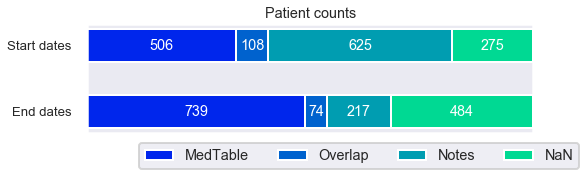

In [32]:
category_names = ['MedTable', 'Overlap','Notes', 'NaN']
results = {
    "Start dates": [506,108,625,275],
    "End dates": [739,74,217,484]
}

###this include medtable, overlap, notes, and nan 

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('winter')(
        np.linspace(0.15, 0.85, data.shape[1]))

    sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2,"font.weight": 900})
    fig, ax = plt.subplots(figsize=(8, 2))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title('Patient counts')
    
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.1, -0.4),
              loc='lower left', fontsize='medium')

    return fig, ax


survey(results, category_names)

In [33]:
#do it for each drug 
ADT_lib=["Leuprolide","Degarelix","Goserelin","Triptorelin","Histrelin"]

In [34]:
#do it for each drug 
adt=ADT_lib[0]
dftemp=df1[(df1["cancer_drug"]==adt)]

print (adt)
#start medtable
print("start med stat")
dfstart_med=dftemp[(dftemp["start_date_source"] == "MedTable")]
A=dfstart_med

A_pt=A.groupby(["person_id"]).size().reset_index(name='counts')
print("row #: " +str(len(A)))
print("pt #: " +str(len(A_pt)))
list_A_pt=A.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()

#end medtable 
print("end med stat")
dfend_med=dftemp[(dftemp["end_date_source"] == "MedTable")]
B=dfend_med
B_pt=B.groupby(["person_id"]).size().reset_index(name='counts')
print("row #: " +str(len(B)))
print("pt #: " +str(len(B_pt)))
list_B_pt=B.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()

#start notes
print("start notes stat")
dfstart_notes=dftemp[(dftemp["start_date_source"] == "Notes")]
C=dfstart_notes
C_pt=C.groupby(["person_id"]).size().reset_index(name='counts')
print("row #: " +str(len(C)))
print("pt #: " +str(len(C_pt)))
list_C_pt=C.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()

#end notes
print("end notes stat")
dfend_notes=dftemp[(dftemp["end_date_source"] == "Notes")]
D=dfend_notes
D_pt=D.groupby(["person_id"]).size().reset_index(name='counts')
print("row #: " +str(len(D)))
print("pt #: " +str(len(D_pt)))
list_D_pt=D.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()

#overlap
overlap_start=[x for x in list_A_pt if x in list_C_pt]
overlap_end=[x for x in list_B_pt if x in list_D_pt]

print("# of pts that have overlap in Medtable and Notes in start dates:",len(overlap_start))
print("# of pts that have overlap in Medtable and Notes in end dates:",len(overlap_end))

Leuprolide
start med stat
row #: 486
pt #: 486
end med stat
row #: 682
pt #: 682
start notes stat
row #: 576
pt #: 576
end notes stat
row #: 186
pt #: 186
# of pts that have overlap in Medtable and Notes in start dates: 0
# of pts that have overlap in Medtable and Notes in end dates: 0


In [35]:
# Leuprolide
start med stat
row #: 486
pt #: 486
end med stat
row #: 682
pt #: 682
start notes stat
row #: 576
pt #: 576
start notes stat
row #: 186
pt #: 186
# of pts that have overlap in Medtable and Notes in start dates: 0
# of pts that have overlap in Medtable and Notes in end dates: 0

SyntaxError: invalid syntax (<ipython-input-35-d45c56960cd2>, line 2)

In [ ]:
#build sub dataframe to get the infor on the pt level
df_med=df1[(df1["end_date_source"] == "MedTable")]

df_med1=df_med[(df_med["cancer_drug"]=="Degarelix")]
df_med2=df_med[(df_med["cancer_drug"]=="Goserelin")]
df_med3=df_med[(df_med["cancer_drug"]=="Histrelin")]
df_med4=df_med[(df_med["cancer_drug"]=="Leuprolide")]
df_med5=df_med[(df_med["cancer_drug"]=="Triptorelin")]

In [ ]:
len(df_med2)

In [ ]:
ADT_lib=["Leuprolide","Degarelix","Goserelin","Triptorelin","Histrelin"]

In [ ]:
i = [*range(0,5,1)]
df_names=[]
for i in [*range(0,5,1)]:
    name="df_med_"+str(i)
    df_names.append(name)
df_names[0]

In [ ]:
ADT_lib

In [ ]:
for adt in ['Leuprolide', 'Degarelix', 'Goserelin', 'Triptorelin', 'Histrelin']:
    for source in ["MedTable", "Notes"]:
        for date in ["start", "end"]:
            print(adt,source,date)
            dftemp=df1[(df1["cancer_drug"]==adt)]
            df_med=dftemp[(dftemp[str(date)+"_date_source"] == source)]
            
            print("row #: " +str(len(dftemp[(dftemp[str(date)+"_date_source"] == source)])))
            print("pt #: " +str(len(dftemp[(dftemp[str(date)+"_date_source"] == source)].groupby(["person_id"]).size().reset_index(name='counts'))))
            list_A_pt=A.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()
            print(len(list_A_pt))
            print("" )

In [ ]:
#start medtable
print("start med stat")
dfstart_med=df1[(df1["start_date_source"] == "MedTable")]
A=dfstart_med

A_pt=A.groupby(["person_id"]).size().reset_index(name='counts')
print("row #: " +str(len(A)))
print("pt #: " +str(len(A_pt)))
list_A_pt=A.groupby(["person_id"]).size().reset_index(name='counts')["person_id"].to_list()

In [ ]:
df_pt_med1=df_med1.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_med1))

df_pt_med2=df_med2.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_med2))
df_pt_med3=df_med3.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_med3))
df_pt_med4=df_med4.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_med4))
df_pt_med5=df_med5.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_med5))

In [ ]:
df_pt_med1

In [ ]:
df_pt_med2=df_med2.groupby(["person_id"]).size().reset_index(name='counts')
print(df_pt_med1["counts"].max())
print(df_pt_med2["counts"].max())
print(df_pt_med3["counts"].max())
print(df_pt_med4["counts"].max())
print(df_pt_med5["counts"].max())

In [ ]:
#build sub dataframe to get the infor on the pt level
df_notes=df1[(df1["end_date_source"] == "Notes")]

df_notes1=df_notes[(df_notes["cancer_drug"]=="Degarelix")]
df_notes2=df_notes[(df_notes["cancer_drug"]=="Goserelin")]
df_notes3=df_notes[(df_notes["cancer_drug"]=="Histrelin")]
df_notes4=df_notes[(df_notes["cancer_drug"]=="Leuprolide")]
df_notes5=df_notes[(df_notes["cancer_drug"]=="Triptorelin")]

df_pt_notes1=df_notes1.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_notes1))
df_pt_notes2=df_notes2.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_notes2))
df_pt_notes3=df_notes3.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_notes3))
df_pt_notes4=df_notes4.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_notes4))
df_pt_notes5=df_notes5.groupby(["person_id"]).size().reset_index(name='counts')
print(len(df_pt_notes5))
print("")
print(df_pt_notes1["counts"].max())
print(df_pt_notes2["counts"].max())
print(df_pt_notes3["counts"].max())
print(df_pt_notes4["counts"].max())
print(df_pt_notes5["counts"].max())

In [ ]:
df_notes=df1[(df1["end_date_source"] == "Notes")]

In [ ]:
df_endmed_group=df_med.groupby(["cancer_drug","person_id"]).size()

In [ ]:
df_endmed_group

In [ ]:
#plot row counts chart for end date grouped by drugs

labels =["Degarelix","Goserelin","Histrelin","Leuprolide","Triporelin"]
end_med = [112,79,0,682,6]
end_note = [88,25,0,186,8]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
sns.set_style("darkgrid")
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, end_med, width, label='MedTable', alpha=0.6)
rects2 = ax.bar(x + width/2, end_note, width, label='Notes', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Row counts by source for end dates')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(ncol=1, bbox_to_anchor=(1.2, 0.5),loc='lower center', fontsize='small')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

In [ ]:
category_names = ['MedTable', 'Notes']
results = {
    "Leuprolide": [682,186],
    "Degarelix": [112,88],
    "Goserelin": [79,25],
    "Triptorelin": [6,8],
    "Histrelin": [0,0]
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('plasma')(
        np.linspace(0.15, 0.85, data.shape[1]))

    sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title('Patient counts by source for end dates')

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.4, 0),
              loc='lower left', fontsize='medium')

    return fig, ax


survey(results, category_names)

# Get data into shape and run through the Step B pipeline

In [ ]:
##step 3.1. fill in the empty cells in day if the month is not empty
##step 3.2. combine year, month and day into date and convert into python datetime format
## step 3.3. make sure they take nan or blank lines
## step 3.4. groupby person id
df2[:5]

In [ ]:
df2

In [ ]:
df2['start_date_source'].replace('', np.nan, inplace=True)
df2['start_date_year'].replace('', np.nan, inplace=True)
df2['start_date_month'].replace('', np.nan, inplace=True)
df2['start_date_day'].replace('', np.nan, inplace=True)

df2['end_date_source'].replace('', np.nan, inplace=True)
df2['end_date_year'].replace('', np.nan, inplace=True)
df2['end_date_month'].replace('', np.nan, inplace=True)
df2['end_date_day'].replace('', np.nan, inplace=True)

In [ ]:
start_day_fill_list=[]
end_day_fill_list=[]


for ind in df2.index:
    if (pd.isnull(df2.loc[ind,'start_date_day']) and pd.notnull(df2.loc[ind,'start_date_month'])): 
        start_day_fill_list.append(ind)
        df2.at[ind,'start_date_day']=1

for ind in df2.index:
    if (pd.isnull(df2.loc[ind,'end_date_day']) and pd.notnull(df2.loc[ind,'end_date_month'])): 
        end_day_fill_list.append(ind) 
        df2.at[ind,'end_date_day']=1

In [ ]:
start_day_fill_list[:5]

In [ ]:
dftest=df2

In [ ]:
##combine the date year, mon, and day columns into one date in the right format
dftest["start_date"]=pd.to_datetime((dftest.start_date_year*10000 + dftest.start_date_month*100+dftest.start_date_day).apply(str),format='%Y%m%d')
dftest["end_date"]=pd.to_datetime((dftest.end_date_year*10000 + dftest.end_date_month*100+dftest.end_date_day).apply(str),format='%Y%m%d')

In [ ]:
#define a subtable 
df3=dftest[['person_id', 'cancer_drug', 'start_date', 'end_date']]

In [ ]:
##before put it through the pipeline, get the stats of empty cells
start_not_end_empty_list=[]
end_not_start_empty_list=[]
both_start_end_empty_list=[]
for ind in df3.index:
    if (pd.isnull(df3.loc[ind,'start_date']) and pd.notnull(df3.loc[ind,'end_date'])): 
        start_not_end_empty_list.append(ind) 
    if (pd.isnull(df3.loc[ind,'end_date']) and pd.notnull(df3.loc[ind,'start_date'])): 
        end_not_start_empty_list.append(ind) 
    if (pd.isnull(df3.loc[ind,'start_date']) and pd.isnull(df3.loc[ind,'end_date'])): 
        both_start_end_empty_list.append(ind) 
print("total row of info: " +str(len(df3)))
print(len(start_not_end_empty_list))
print(len(end_not_start_empty_list))
print(len(both_start_end_empty_list))

In [ ]:
#df4 is a groupby person_id table
df4=df3.groupby(["person_id"]).size().reset_index(name='counts')

In [ ]:
df4["counts"].max()
df4[(df4["counts"] == 4)]

In [ ]:
#get the list of pt ids
list_pts=df4["person_id"].to_list()
list_pts
print("number of patients is:")
len(list_pts)

In [ ]:
df_ptcheck=df3[(df3["person_id"] == 9533)]
df_ptcheck

In [ ]:
list_pts

In [ ]:
result_list=[]

for y in list_pts:      
#for y in [2,12,13,18,22]:
#for y in [12,13]:

    #subset the dataframe to each pt
    #get start dates and end dates to lists
    df_pt=df3[(df3["person_id"] == y)]
    
    each_pt_drug_start = df_pt['start_date'].to_list()
    each_pt_drug_end = df_pt['end_date'].to_list()

    ##get rid of nan
    cleaned_a=[]
    cleaned_a= [x for x in each_pt_drug_start if str(x) != 'NaN']
    cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
    cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
    cleaned_b=[]
    cleaned_b= [x for x in each_pt_drug_end if str(x) != 'NaN']
    cleaned_bb= [x for x in cleaned_b if str(x) != 'nan']
    cleaned_bbb= [x for x in cleaned_bb if str(x) != 'NaT']

    ##get the date format right
    #startdatebin=[datetime.fromisoformat(str(x)) for x in cleaned_aa]
    #enddatebin=[datetime.fromisoformat(str(x)) for x in cleaned_bb]

    #sort 
    start_sorted_bin=sorted(cleaned_aaa)
    end_sorted_bin=sorted(cleaned_bbb)
    
    start_with_2round=[]
    start_with_1round=[]
    
    if(len(start_sorted_bin)==0):
        startdate='NaN'  
        
    if(len(start_sorted_bin)>0):
        a=start_sorted_bin[0]
        
        for b in start_sorted_bin:
        #find all adt starting dates after 6months of inital starting    
            if float(abs(a-b).days)>182.5:
                start_with_2round.append(a)
                start_with_2round.append(b)
            else:
                start_with_1round.append(a) 
        #cleanup 
        start_with_2round=start_with_2round[:2]

        #get rid of repeated capturing for one round
        cleanlist = []
        for i in start_with_1round:
            if i not in cleanlist:
                cleanlist.append(i)
        start_with_1round=cleanlist
        #print(cleanlist)
        enddateall=[]

    if len(end_sorted_bin)==0:
        enddate='NaN'
        if(len(start_sorted_bin)==0):
            startdate='NaN' 
        if(len(start_sorted_bin)>0):    
            startdate=start_with_1round[0]
        
    if len(end_sorted_bin)>0:
        for i in end_sorted_bin:
        #at least two rounds of ADTs
            if len(start_with_2round)==2:
                if(i>=sorted(start_with_2round)[0]) and (i<=sorted(start_with_2round)[1]):
                    startdate=sorted(start_with_2round)[0]
                    enddateall.append(i)
                    #print(enddateall)
                #pick the one that is most close to the 2nd adt starting date
                    if len(enddateall) == 0:
                        enddate='NaN' 
                    else:
                        enddate=enddateall[-1]

                if(i>sorted(start_with_2round)[0]) and (i>sorted(start_with_2round)[1]) and (len(enddateall) == 0):
                    startdate=sorted(start_with_2round)[0]
                    enddate='NaN'
                    #leave it as empty
        
        #only one round           
            if (len(start_with_2round)<2) and (len(start_with_1round)==1):
                if(i>=sorted(start_with_1round)[0]):
                    startdate=start_with_1round[0]
                    enddateall.append(i)
                    if len(enddateall) == 0:
                        enddate='NaN' 
                    else:
                        enddate=enddateall[-1]
                           
    print(y, startdate, enddate)
    result_per_pt=[y,startdate, enddate]
    result_list.append(result_per_pt)

In [ ]:
df_results=pd.DataFrame(result_list)
df_results.columns=(['person_id', 'inital_ADT_start_date', 'inital_ADT_end_date'])
#create a column for the time window 
df_results['Inital_ADT_timewindow'] = df_results['inital_ADT_end_date'] - df_results['inital_ADT_start_date']
#create a column for the inital adt use window as days
df_results['Inital_ADT_time_window_days']=df_results['Inital_ADT_timewindow'].dt.days
print(shape(df_results))

In [ ]:
df_results
df_results['index1'] = df_results.index
df_results

In [ ]:
## sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})
binsize=180

bins=np.arange(0, 1500, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(df_results['Inital_ADT_time_window_days'], bins=bins,color="green", alpha=0.4)

#decorate
plt.title("Bin Size="+ str(binsize) +" days")
plt.xlabel("Days", fontsize=20, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=20,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1501, 180))
ax.set_xticklabels(np.arange(0, 1501, 180))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()

In [ ]:
## sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})
binsize=180

bins=np.arange(0, 1500, binsize)
fig, ax = plt.subplots(figsize = (8,5))

#n=df_results['Inital_ADT_time_window_days'].plot(kind = "hist", bins=bins, color="purple", alpha=0.5)
(n, bins, patches) = plt.hist(df_results['Inital_ADT_time_window_days'], bins=bins,color="green", alpha=0.4)

#decorate
plt.title("Bin Size="+ str(int(binsize/30)) +" months")
plt.xlabel("Months", fontsize=20, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=20,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1501, 180))
ax.set_xticklabels(np.arange(0, 50, 6))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.5
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()

In [ ]:
#pt statistics

df_start_empty=df_results[df_results.inital_ADT_start_date.isnull()]
df_end_empty=df_results[df_results.inital_ADT_end_date.isnull()]
df_both_empty1=df_results[df_results.inital_ADT_end_date.isnull()][df_results.inital_ADT_start_date.isnull()]
#df_onlystartempty=df_results[df_results.inital_ADT_start_date.isnull()][df_results.inital_ADT_end_date.notnull()]
#df_onlyendempty=df_results[df_results.inital_ADT_end_date.isnull()][df_results.inital_ADT_start_date.notnull()]
df_both=df_results[df_results.inital_ADT_end_date.notnull()][df_results.inital_ADT_start_date.notnull()]
#df_ADT_window_zero=df_results[df_results.Inital_ADT_time_window_days==0]

print("Number of pts with start dates empty is: " + str(len(df_start_empty)))
print("Number of pts with end dates empty is: " + str(len(df_end_empty)))  
print("Number of pts with both dates empty is: " + str(len(df_both_empty1)))
print("Number of pts with both dates: " + str(len(df_both)))

In [ ]:
df_just_start_empty=df_results[df_results.inital_ADT_start_date.isnull()][df_results.inital_ADT_end_date.notnull()]
df_just_end_empty=df_results[df_results.inital_ADT_end_date.isnull()][df_results.inital_ADT_start_date.notnull()]
df_both_empty=df_results[df_results.inital_ADT_end_date.isnull()][df_results.inital_ADT_start_date.isnull()]
df_both=df_results[df_results.inital_ADT_end_date.notnull()][df_results.inital_ADT_start_date.notnull()]

In [ ]:
df_start_empty

In [ ]:
554-303

In [ ]:
323-303
20
251
303
940

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '#1', '#2','#3','#4'
sizes = [940,251,303,20]
explode = (0.05, 0.0, 0,0)  #
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots(figsize = (5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=60)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
print(str(940+251+303+20))

In [ ]:
window_empty_list=[]
for ind in df_results.index:
    if (pd.isnull(df_results.loc[ind,'Inital_ADT_timewindow'])): 
        window_empty_list.append(ind) 
        
print("pt # without intial ADT window")
print(str(a))
a=len(window_empty_list)
print("pt # with intial ADT window")
print(str(1514 -a))

dftemp=df_results

for ind in window_empty_list:
    dftemp.drop(index=ind)
shape(df_results)
shape(dftemp)

In [ ]:
df_results.to_csv("pca_bigcohort_results_adtwindow_1514pts.csv", encoding='utf-8', index=False)

In [ ]:
df_start_empty.to_csv("bigcohort_startempty.csv", encoding='utf-8', index=False)
df_end_empty.to_csv("bigcohort_endempty.csv", encoding='utf-8', index=False)
df_both_empty1.to_csv("bigcohort_bothempty.csv", encoding='utf-8', index=False)
df_both.to_csv("bigcohort_bothavail.csv", encoding='utf-8', index=False)

In [ ]:
df_just_start_empty.to_csv("bigcohort_just_startempty.csv", encoding='utf-8', index=False)
df_just_end_empty.to_csv("bigcohort_just_endempty.csv", encoding='utf-8', index=False)
df_both_empty.to_csv("bigcohort_bothempty.csv", encoding='utf-8', index=False)

In [ ]:
#df_both=df_results[df_results.inital_ADT_end_date.notnull()][df_results.inital_ADT_start_date.notnull()]
#df_both.to_csv("bigcohort_bothok_check.csv", encoding='utf-8', index=False)
df_both1=df_results[df_results.inital_ADT_end_date.notnull()]
df_both2=df_both1[df_both1.inital_ADT_start_date.notnull()]
#df_both=df_results[df_results.inital_ADT_end_date.notnull()][df_results.inital_ADT_start_date.notnull()]
df_both2.to_csv("bigcohort_bothok_new.csv", encoding='utf-8', index=False)

In [ ]:
print(str(len(df_just_start_empty)))
print(str(len(df_just_end_empty)))
print(str(len(df_both_empty)))
print(str(len(df_both2)))